# **BREAST CANCER PREDICTION**
To predict whether the cancer is benign or malignant

*   Benign Tumour
  *   Non-cancerous growths
  *   Usually slow-growing and well-defined
  *   Do not invade nearby tissues or spread to other parts of the body
  *   Generally considered less serious and often removable with surgery
  *   Rarely life-threatening



*   Malignant Tumour
  *   Cancerous growths
  *   Can grow rapidly and aggressively
  *   Invade surrounding tissues and organs
  *   Can spread (metastasize) to distant parts of the body via bloodstream or lymphatic system
  *   Require prompt treatment such as surgery, chemotherapy, or radiation
  *   Potentially life-threatening if untreated

 **Basic Functionalities**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.shape

(569, 33)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **LINEAR REGRESSION**

In [ ]:
# Fit the linear regression model
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']
X = data[features]
y = data['diagnosis']  # Assume diagnosis is already encoded as 0 (benign), 1 (malignant)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

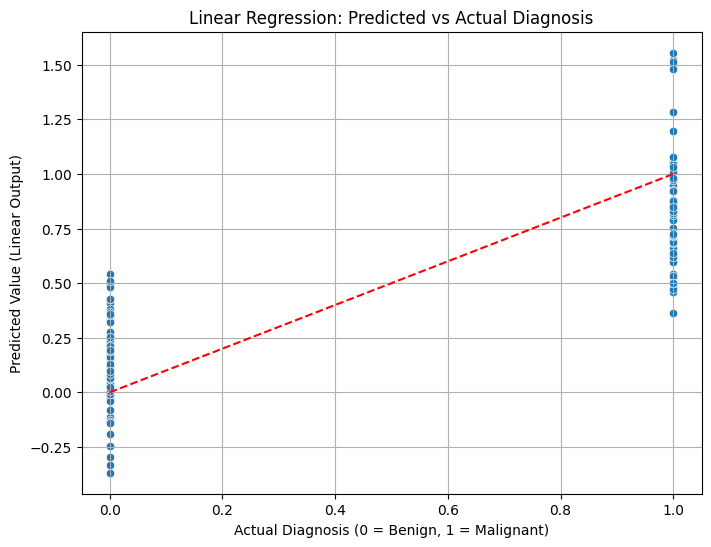

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 1], [0, 1], 'r--')  # Ideal line (pred = true)

plt.xlabel("Actual Diagnosis (0 = Benign, 1 = Malignant)")
plt.ylabel("Predicted Value (Linear Output)")
plt.title("Linear Regression: Predicted vs Actual Diagnosis")
plt.grid(True)
plt.show()

# **LOGISTIC REGRESSION**

In [ ]:
features = ['radius_mean','texture_mean','area_mean','smoothness_mean','compactness_mean']
X = data[features]
y = data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

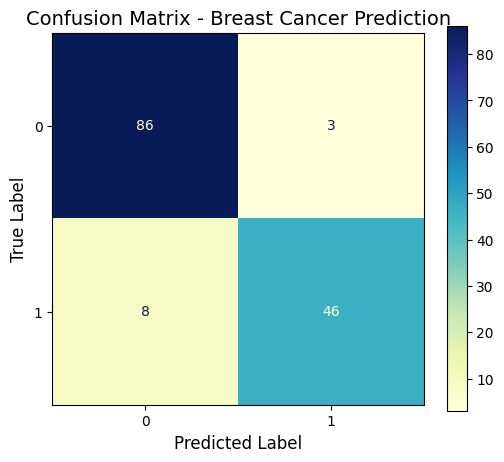

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the display with a custom colormap (e.g., 'Blues', 'Purples', 'YlGnBu', 'BuPu')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot with styling
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap='YlGnBu', ax=ax, colorbar=True)
# Title and formatting
plt.title("Confusion Matrix - Breast Cancer Prediction", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)
plt.show()

In [ ]:
model.score(X_test, y_test)

0.9230769230769231

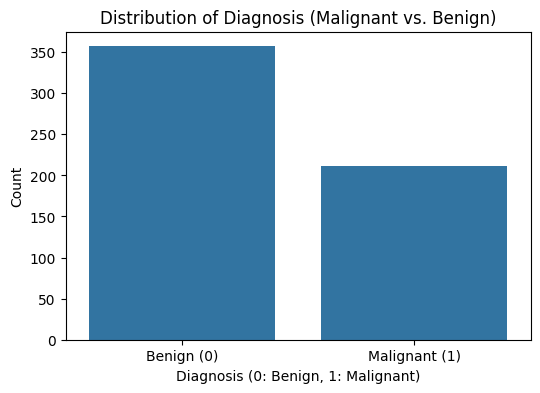

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()

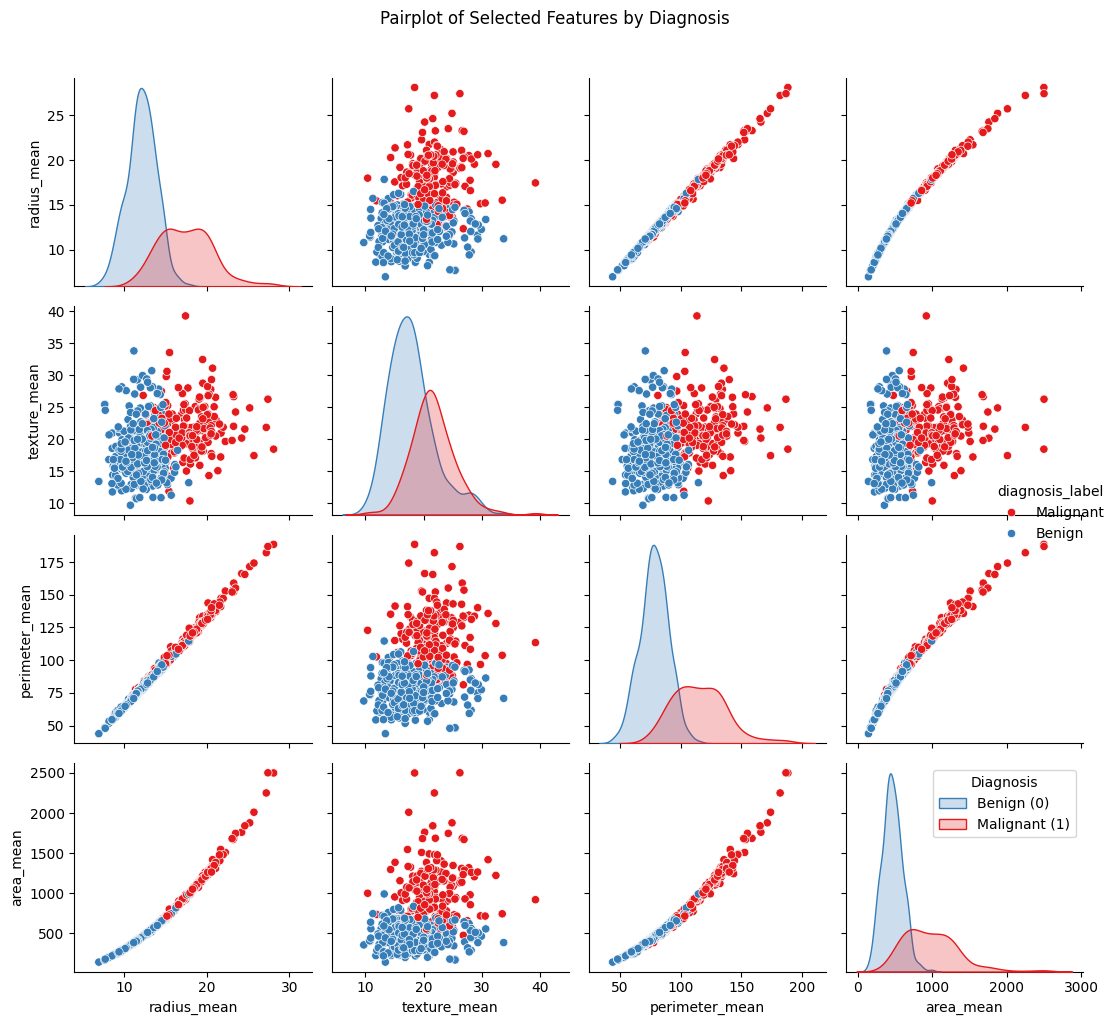

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert diagnosis to string labels for better hue legends
data['diagnosis_label'] = data['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Pairplot with hue
sns.pairplot(data, hue='diagnosis_label', vars=[ 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], palette='Set1')
plt.legend(title='Diagnosis', loc='upper right', labels=['Benign (0)', 'Malignant (1)'])
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.tight_layout()
plt.show()

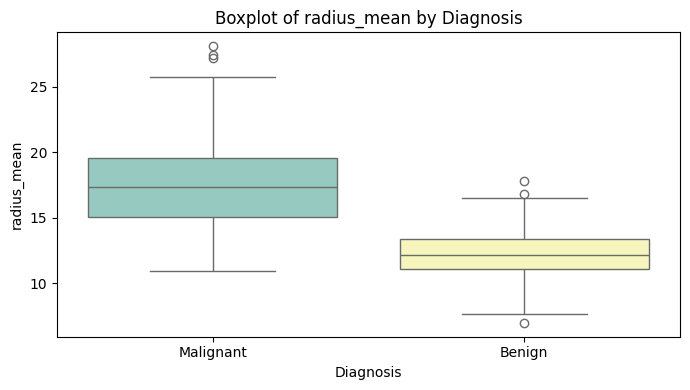

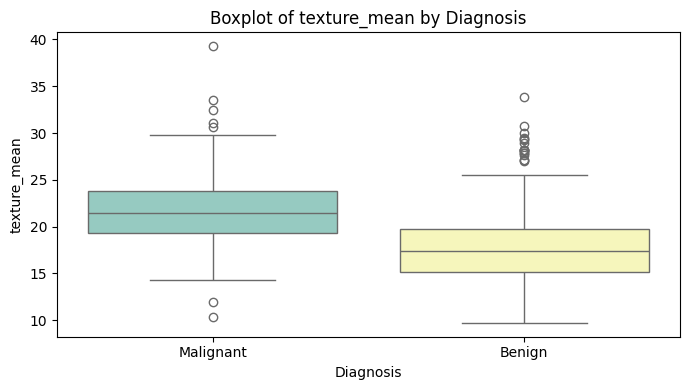

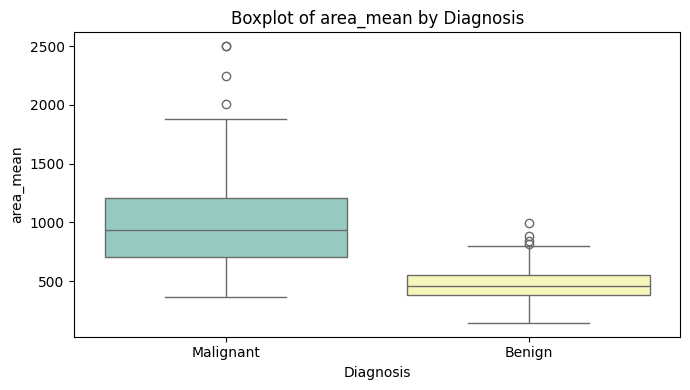

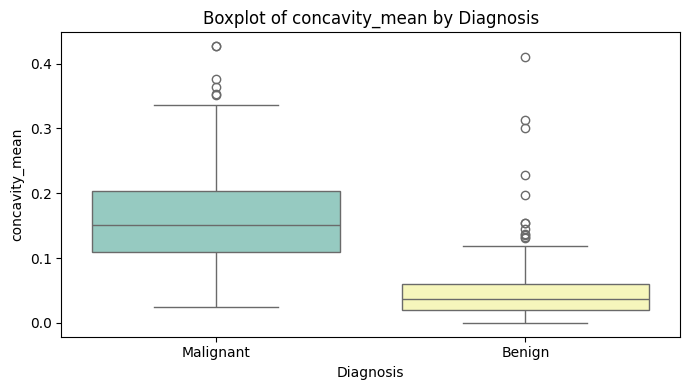

In [ ]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='diagnosis_label', y=feature, data=data, palette='Set3')
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


In [ ]:
report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

      Benign       0.91      0.97      0.94        89
   Malignant       0.94      0.85      0.89        54

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [ ]:
# Define the feature to use for plotting the logistic regression curve
feature_log = 'radius_mean'

# Use the existing logistic regression model
log_model = model

# Select the feature for training and testing the log model
X_log = data[[feature_log]]
y_log = data['diagnosis']

# Split the data for the log model
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.25, random_state=42)


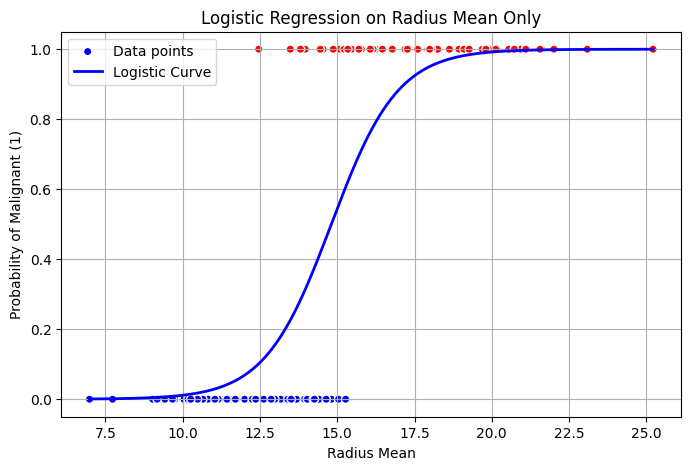

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train a model on only radius_mean for visualization
log_model_1d = LogisticRegression()
log_model_1d.fit(X_train[['radius_mean']], y_train)

# Generate predictions
radius_range = np.linspace(X_test['radius_mean'].min(), X_test['radius_mean'].max(), 300)
radius_range_reshaped = radius_range.reshape(-1, 1)
probs_plot = log_model_1d.predict_proba(radius_range_reshaped)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_test['radius_mean'], y_test, c=y_test, cmap='bwr', edgecolors='white', label='Data points')
plt.plot(radius_range, probs_plot, color='blue', linewidth=2, label='Logistic Curve')
plt.xlabel('Radius Mean')
plt.ylabel('Probability of Malignant (1)')
plt.title('Logistic Regression on Radius Mean Only')
plt.legend()
plt.grid(True)
plt.show()
